<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [41]</a>'.</span>

In [1]:
# Parameters
h5_name = '{PATH_TO_CATATAC_5_CRISPR9_H5SEURAT}'
protosp_path = '{PATH_TO_PROTOSPACERS_4SET_TSV}'


In [2]:
library(Seurat)
library(SeuratDisk)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)
library(bedr)
library(Biostrings)
library(SeuratPipe)
library(scales)
library(reshape2)
library(Hmisc)
library(tidyr)
library(patchwork)
library(readr)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    g

In [3]:
set.seed(12345678)

# Load files

## Load Seurat file

In [4]:
#h5_name = '{PATH_TO_CATATAC_4_CONDITION_07_H5SEURAT}'
seurat_w_doublet_scores <- LoadH5Seurat(h5_name, verbose = FALSE)

Validating h5Seurat file



## Load protospacer file

In [5]:
#protosp_path = '{PATH_TO_PROTOSPACERS_4SET_TSV_2}'
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [6]:
genes_to_plot  = unique(df_protosp$X.TargetGene)
select_ntctl   = grepl("NTCTL", genes_to_plot) | grepl("NTCTRL", genes_to_plot)
genes_to_plot  = genes_to_plot[!select_ntctl]
genes_to_plot

[1] "GATA5"   "MEOX1"   "NEUROG2"

# More QC

In [7]:
n_doublets <- sum(seurat_w_doublet_scores@meta.data$predicted_doublets)
n_cells    <- nrow(seurat_w_doublet_scores@meta.data)
cat("Doublets detected:", n_doublets, "out of", n_cells, "cells.")

Doublets detected: 0 out of 6983 cells.

In [8]:
options(repr.plot.width=8, repr.plot.height=5)
tresh.value <- quantile(seurat_w_doublet_scores@meta.data$doublet_scores, 0.999) # set this value according 
     # to the output log form scrublet estimated detectable doublet fraction
#plt_scrublet_hist(seurat_w_doublet_scores, tresh.value = tresh.value, bin.width = 0.01)

In [9]:
klet_classes = c("singlet", "doublet")
table(klet_classes[seurat_w_doublet_scores$predicted_doublets+1])


singlet 
   6983 

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



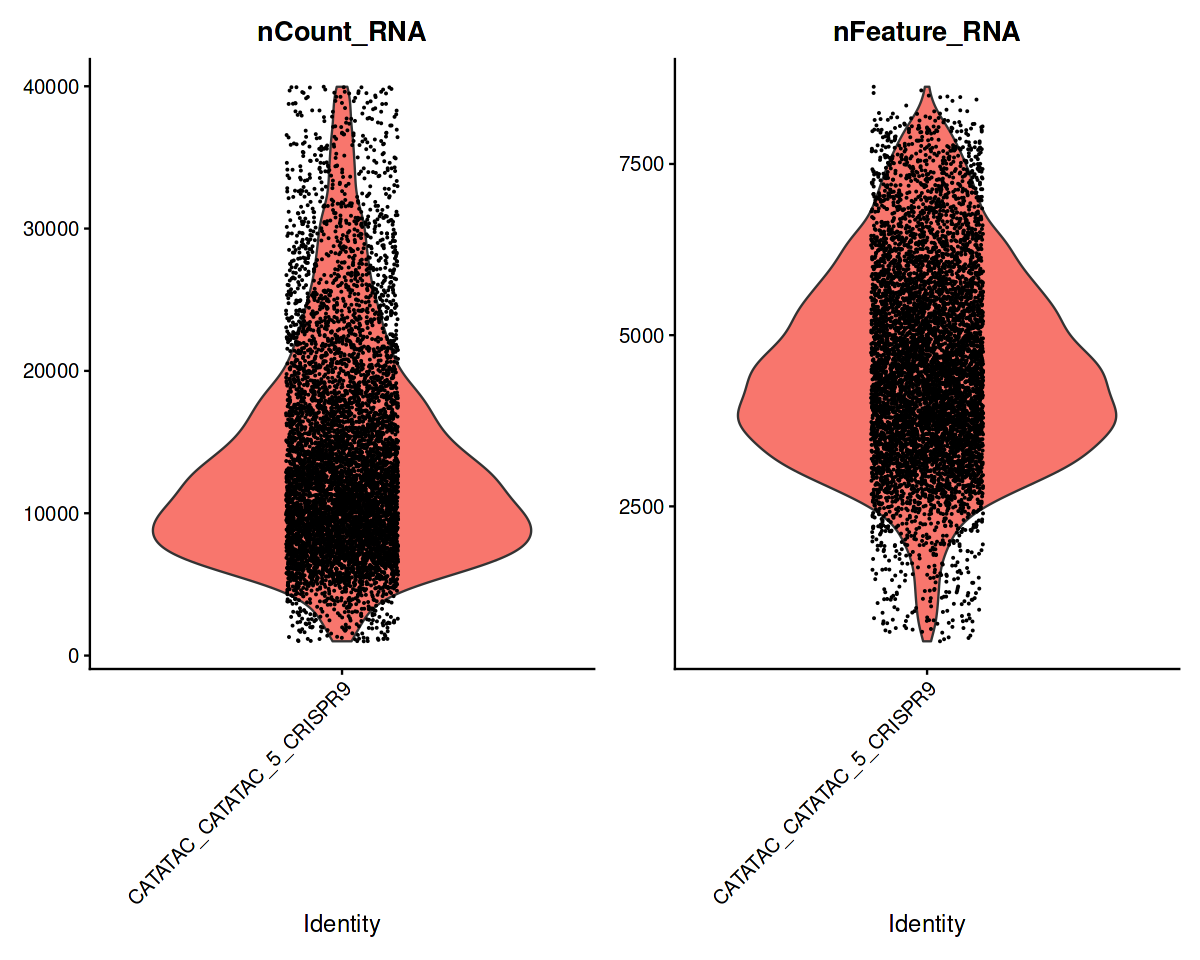

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
VlnPlot(
    seurat_w_doublet_scores, 
    features = c('nCount_RNA', 'nFeature_RNA'),
    split.by = 'predicted_doublets'
)

In [11]:
head(seurat_w_doublet_scores)

nCount_ATAC nFeature_ATAC nCount_RNA nFeature_RNA
AAACAGCCACAACAGG-1 10251       4884           9546      3927        
AAACAGCCACCACAAC-1  7425       3511          11406      4023        
AAACAGCCAGGGAGGA-1 12232       5861          23017      6010        
AAACAGCCATAGGCGA-1 10948       5232          10585      3919        
AAACAGCCATCCGTAA-1 18701       8520          20265      6139        
AAACAGCCATTGTGCA-1 12658       6029          18015      5394        
AAACATGCAACACTTG-1  9391       4598           7700      3708        
AAACATGCAGCACGAA-1 11557       5483           5976      2998        
AAACATGCAGGACACA-1  5136       2621          31272      7096        
AAACATGCAGTAAAGC-1  5915       2910          11092      4472        
                   orig.ident                percent.mt nucleosome_signal
AAACAGCCACAACAGG-1 CATATAC_CATATAC_5_CRISPR9  7.971925  0.7152015        
AAACAGCCACCACAAC-1 CATATAC_CATATAC_5_CRISPR9 11.450114  0.7203166        
AAACAGCCAGGGAGGA-1 CATATAC_CATATAC_5_CRISPR9 14.324195  0.8605072        
AAACAGCCATAGGCGA-1 CATATAC_CATATAC_5_CRISPR9 12.508266  0.6950904        
AAACAGCCATCCGTAA-1 CATATAC_CATATAC_5_CRISPR9 13.728103  0.7990627        
AAACAGCCATTGTGCA-1 CATATAC_CATATAC_5_CRISPR9 11.362753  0.7561728        
AAACATGCAACACTTG-1 CATATAC_CATATAC_5_CRISPR9  5.480519  0.7432286        
AAACATGCAGCACGAA-1 CATATAC_CATATAC_5_CRISPR9  4.601740  0.7389341        
AAACATGCAGGACACA-1 CATATAC_CATATAC_5_CRISPR9 10.728447  0.7804428        
AAACATGCAGTAAAGC-1 CATATAC_CATATAC_5_CRISPR9 11.350523  0.8007864        
                   nucleosome_percentile TSS.enrichment TSS.percentile
AAACAGCCACAACAGG-1 0.43                  5.881337       0.81          
AAACAGCCACCACAAC-1 0.45                  4.596764       0.16          
AAACAGCCAGGGAGGA-1 0.89                  5.103891       0.41          
AAACAGCCATAGGCGA-1 0.34                  5.354402       0.57          
AAACAGCCATCCGTAA-1 0.75                  5.616442       0.71          
AAACAGCCATTGTGCA-1 0.60                  4.934033       0.31          
AAACATGCAACACTTG-1 0.55                  4.987869       0.35          
AAACATGCAGCACGAA-1 0.53                  5.197542       0.47          
AAACATGCAGGACACA-1 0.69                  4.375170       0.09          
AAACATGCAGTAAAGC-1 0.75                  5.664103       0.73          
                   nCount_SCT nFeature_SCT predicted_doublets doublet_scores
AAACAGCCACAACAGG-1 11163      3926         0                  0             
AAACAGCCACCACAAC-1 11693      4022         0                  0             
AAACAGCCAGGGAGGA-1 13123      5139         0                  0             
AAACAGCCATAGGCGA-1 11378      3918         0                  0             
AAACAGCCATCCGTAA-1 13230      5753         0                  0             
AAACAGCCATTGTGCA-1 13147      5315         0                  0             
AAACATGCAACACTTG-1 10956      3721         0                  0             
AAACATGCAGCACGAA-1 11060      3189         0                  0             
AAACATGCAGGACACA-1 12862      4879         0                  0             
AAACATGCAGTAAAGC-1 11484      4469         0                  0

Warning message in FeaturePlot(seurat_w_doublet_scores, features = "doublet_scores", :
"All cells have the same value (0) of doublet_scores."


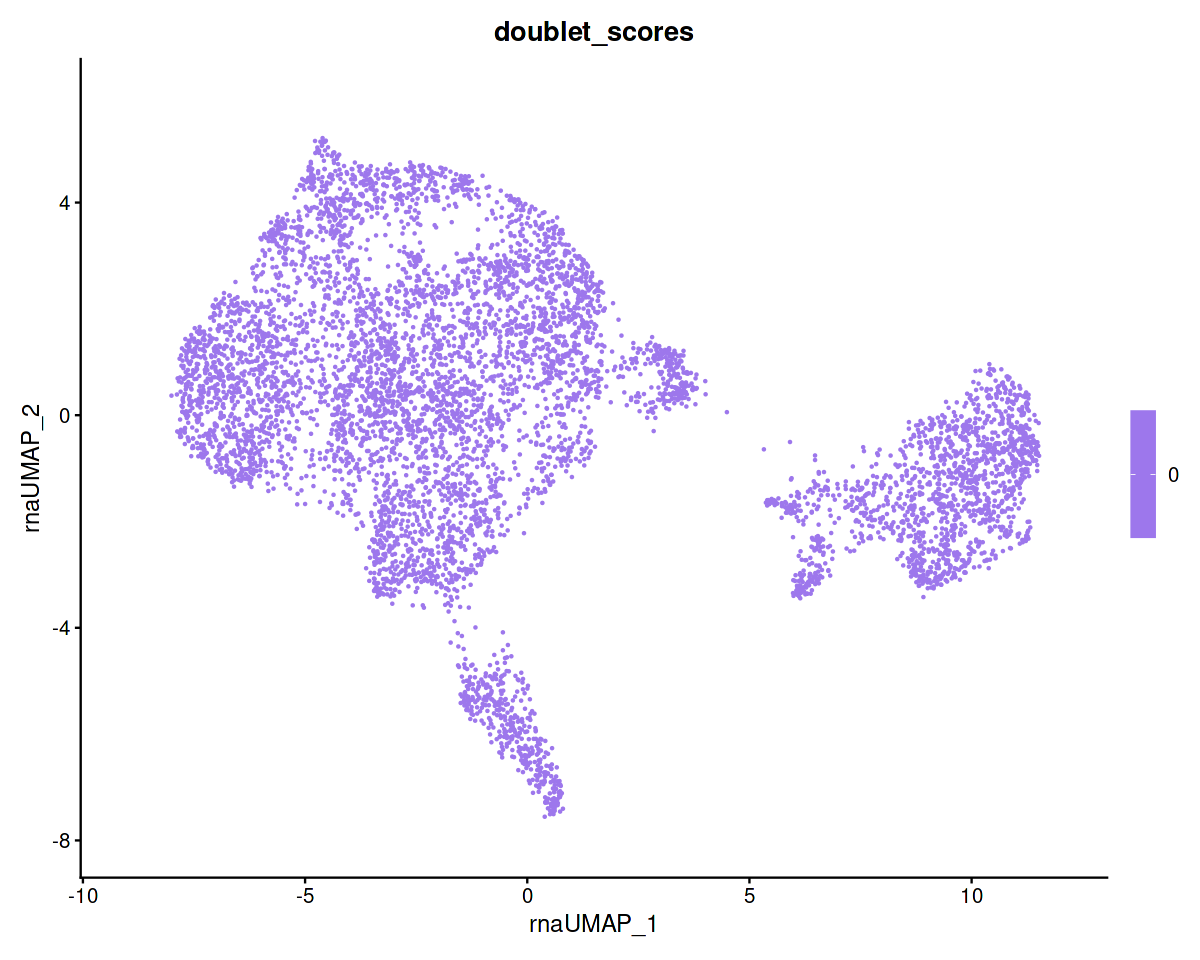

In [12]:
FeaturePlot(
    seurat_w_doublet_scores, 
    features = 'doublet_scores', 
    min.cutoff = "q99", 
    reduction = 'umap.rna'
) 

## Check if clustering is driven by UMI counts (not relevant for CKD)

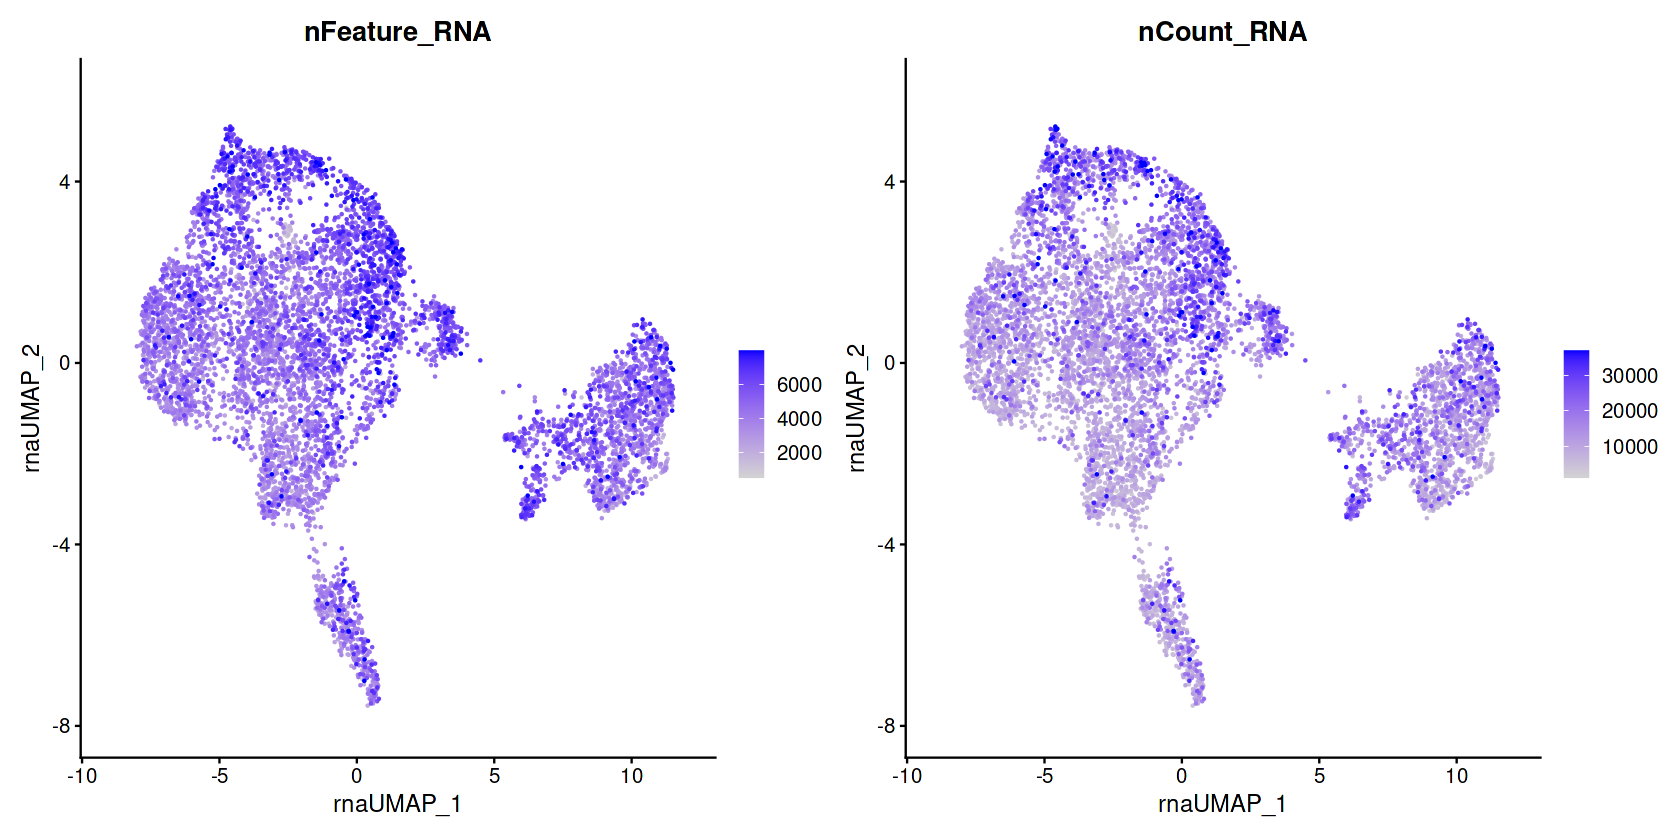

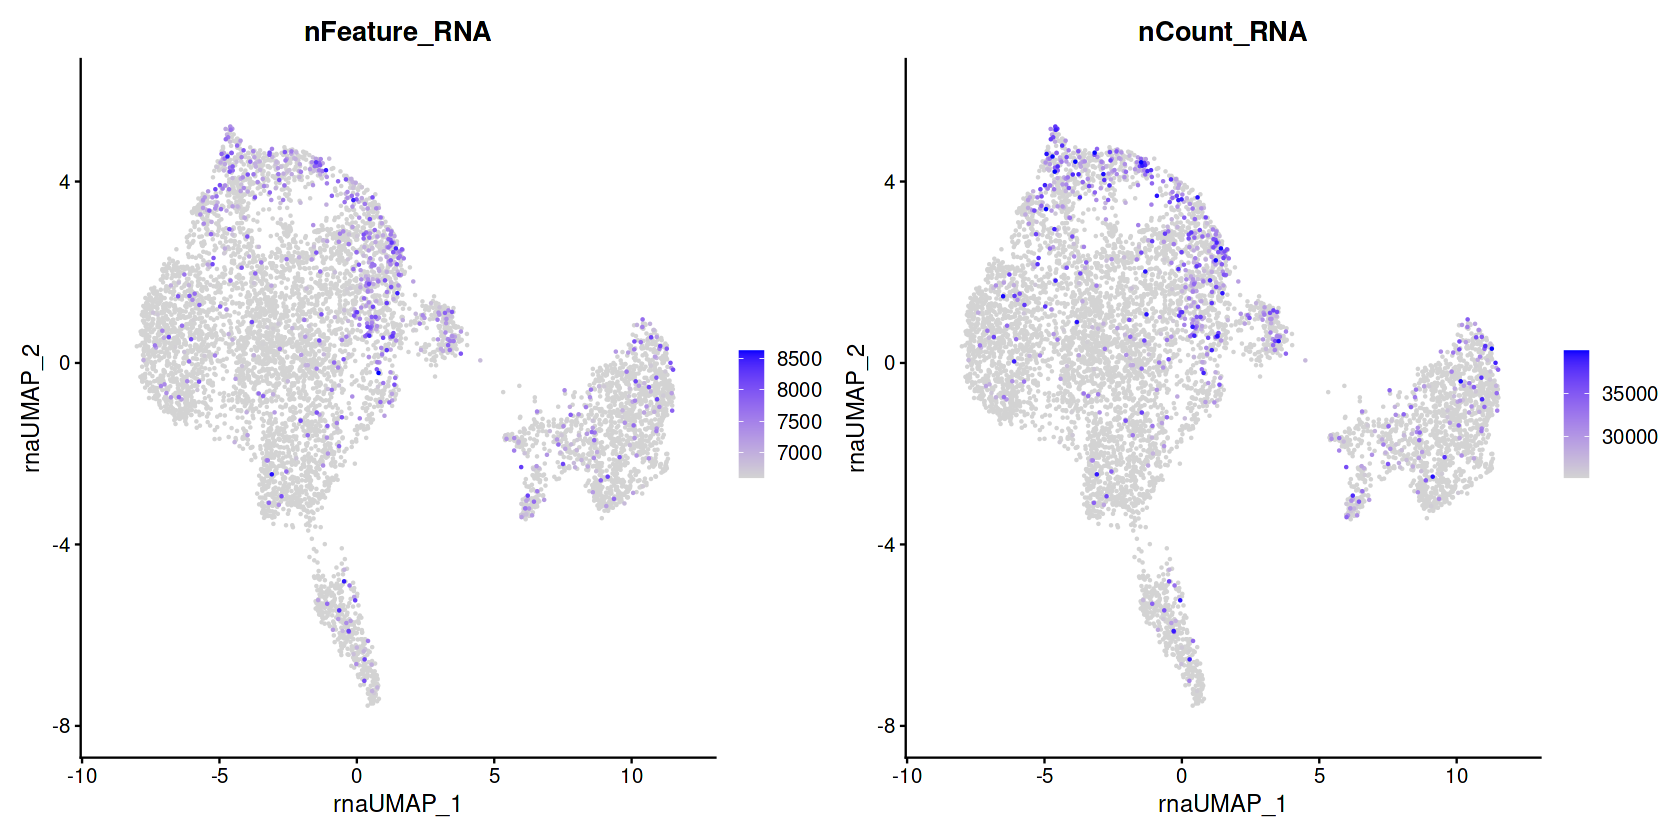

In [13]:
options(repr.plot.width=14, repr.plot.height=7)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = NA, 
    max.cutoff = "q99", 
    ncol = 2, 
    order=T
)
FeaturePlot(
    seurat_w_doublet_scores, 
    reduction= "umap.rna", 
    features = c("nFeature_RNA", "nCount_RNA"), 
    min.cutoff = "q90", 
    max.cutoff = NA, 
    ncol = 2, 
    order=T
)

In [14]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$nCount_RNA, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$nCount_RNA
# cor.test(x, y, method="pearson")

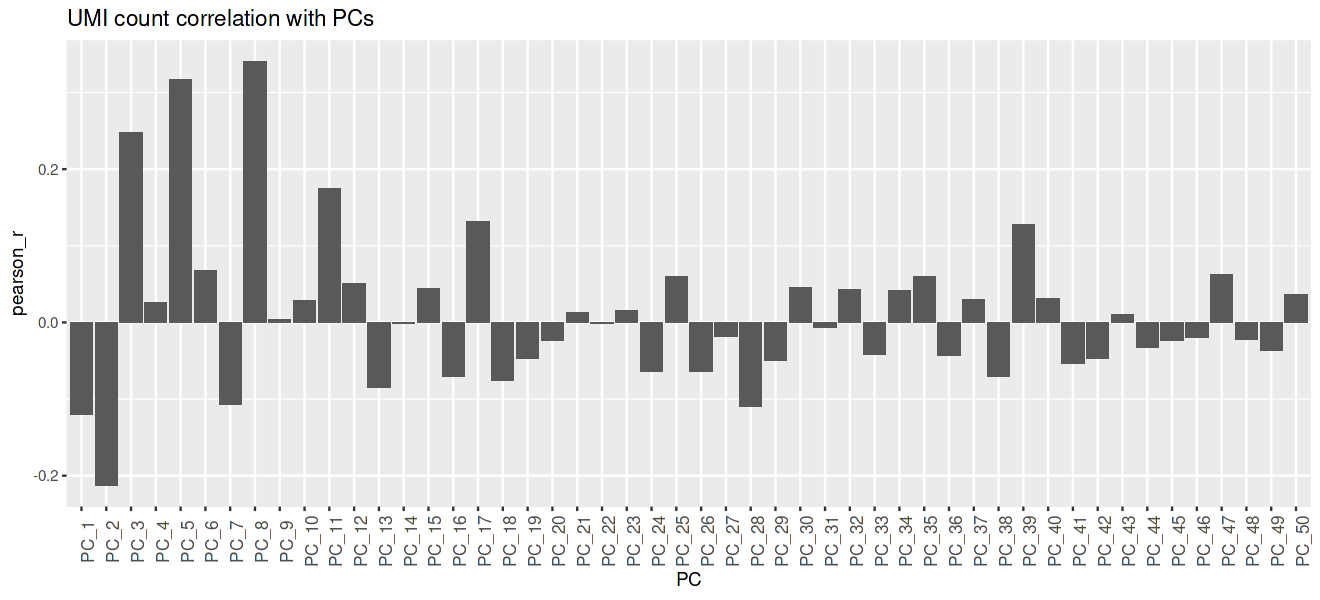

In [15]:
options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "UMI count correlation with PCs")
    

## Check if mito reads are driving the clustering

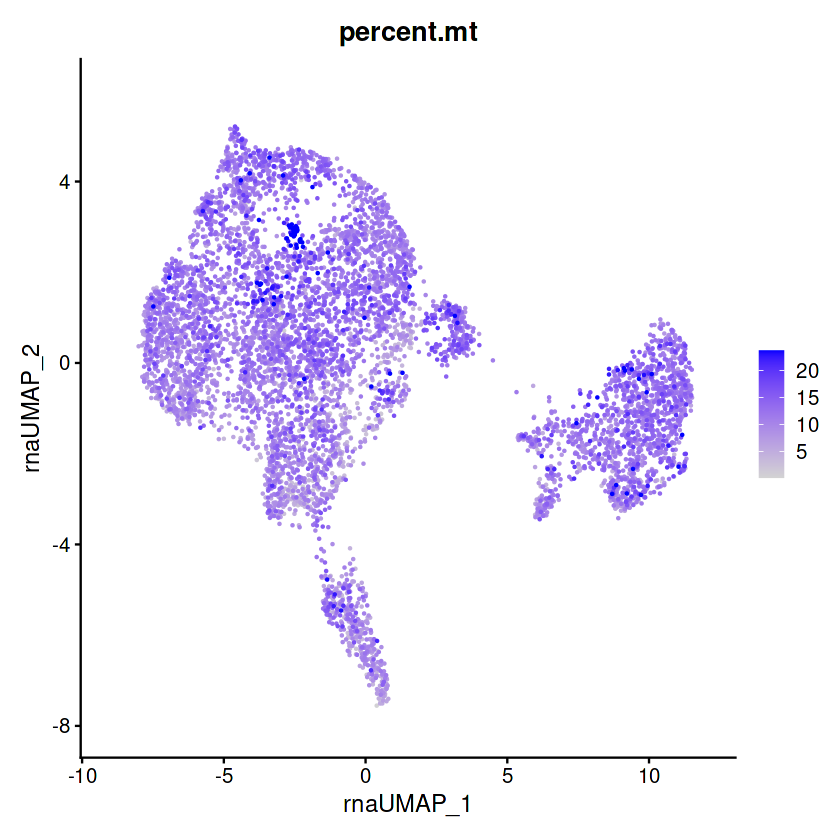

In [16]:
options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(seurat_w_doublet_scores, reduction= "umap.rna", features = c("percent.mt"), min.cutoff = NA, max.cutoff = "q99", order=T)

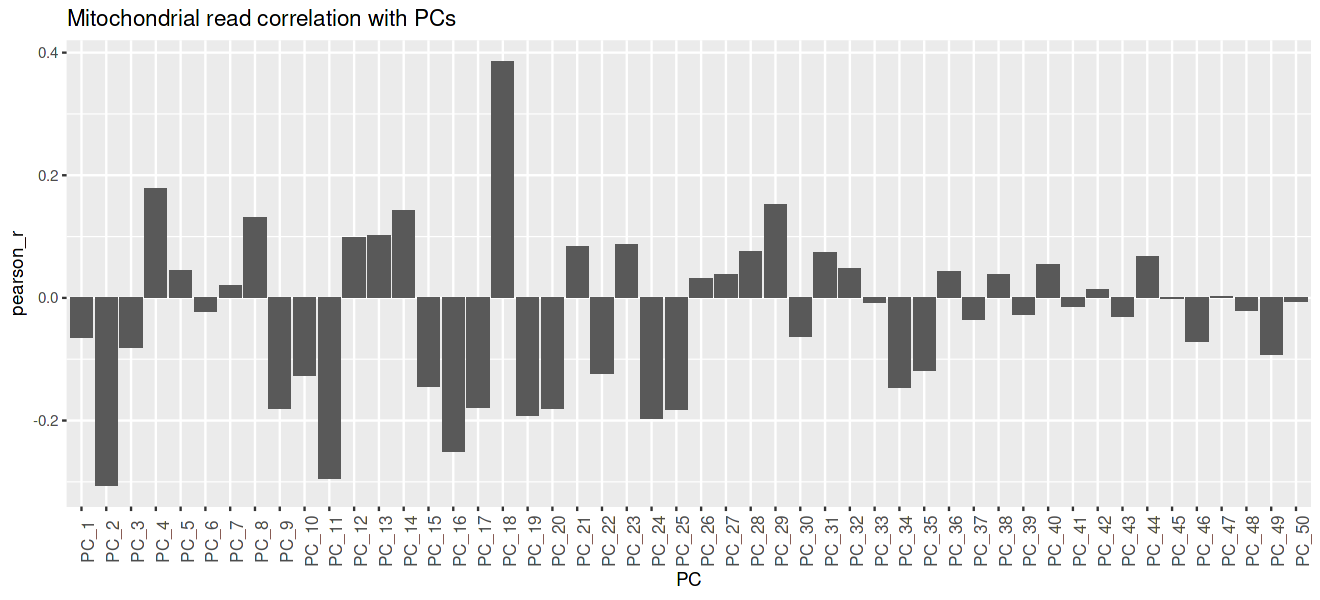

In [17]:
corr_list <- apply(
                    as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings), 2, 
                    function(x) cor.test(x, seurat_w_doublet_scores$percent.mt, method="pearson")$estimate
            )

df_corrs <- as.data.frame(corr_list)
colnames(df_corrs) <- c("pearson_r")
df_corrs$PC <- rownames(df_corrs)
df_corrs$PC <- factor(df_corrs$PC, levels = df_corrs$PC)

# x = as.data.frame(seurat_w_doublet_scores@reductions$pca@cell.embeddings)$PC_1
# y = seurat_w_doublet_scores$percent.mt
# cor.test(x, y, method="pearson")

options(repr.plot.width=11, repr.plot.height=5)
ggplot(df_corrs, aes(x=PC, y=pearson_r)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, size = 10)) +
    labs(title = "Mitochondrial read correlation with PCs")
    

# Filter out multiplets

In [18]:
#select_singlets = seurat_w_doublet_scores$predicted_doublets == 0
seurat <- subset(seurat_w_doublet_scores, predicted_doublets == 0)

In [19]:
nrow(seurat@meta.data)
nrow(seurat_w_doublet_scores@meta.data)

[1] 6983

[1] 6983

# SVD

In [20]:
DefaultAssay(seurat) <- "ATAC"
seurat <- RunTFIDF(seurat)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"


In [21]:
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')

In [22]:
seurat <- RunSVD(seurat)

Running SVD

Scaling cell embeddings



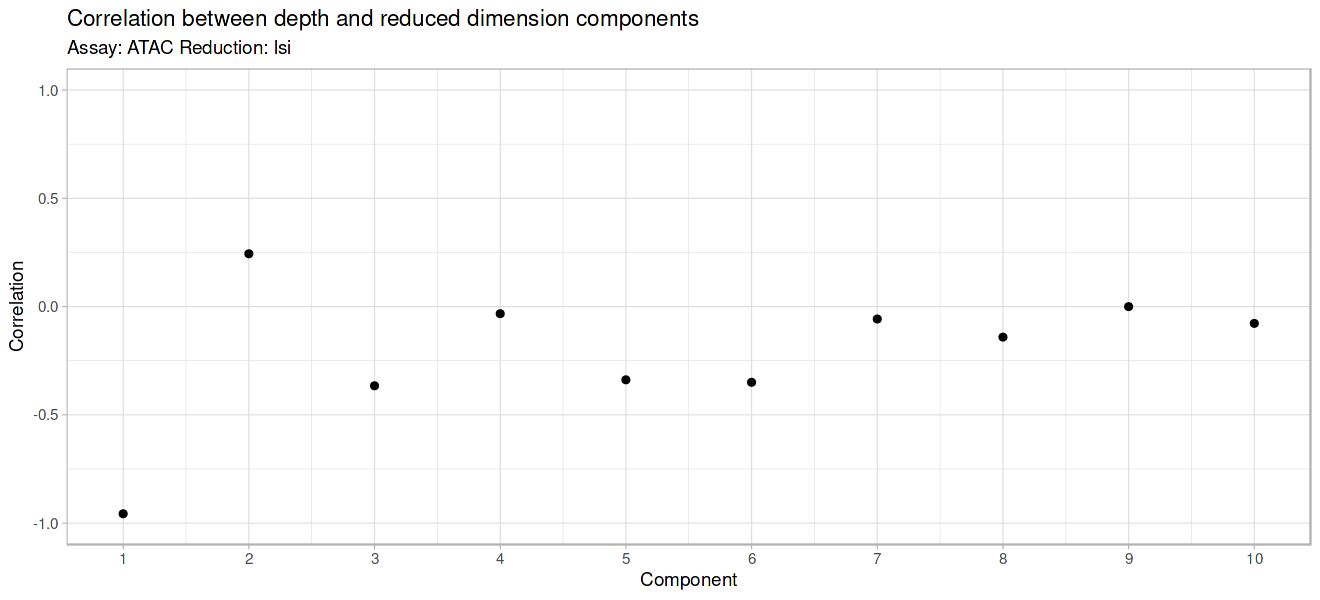

In [23]:
DepthCor(seurat)

In [24]:
# We exclude the first dimension as this is typically correlated with sequencing depth
seurat <- RunUMAP(seurat, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:40:54 UMAP embedding parameters a = 0.9922 b = 1.112

14:40:54 Read 6983 rows and found 49 numeric columns

14:40:54 Using Annoy for neighbor search, n_neighbors = 30

14:40:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:40:55 Writing NN index file to temp file /tmp/RtmpiphAHA/file2a8ca3288ca91

14:40:55 Searching Annoy index using 1 thread, search_k = 3000

14:40:58 Annoy recall = 100%

14:40:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [25]:
options(repr.plot.width=10, repr.plot.height=10)
seurat <- FindNeighbors(object = seurat, reduction = 'lsi', dims = 2:30)
seurat <- FindClusters(object = seurat, verbose = FALSE, algorithm = 3)

Computing nearest neighbor graph

Computing SNN



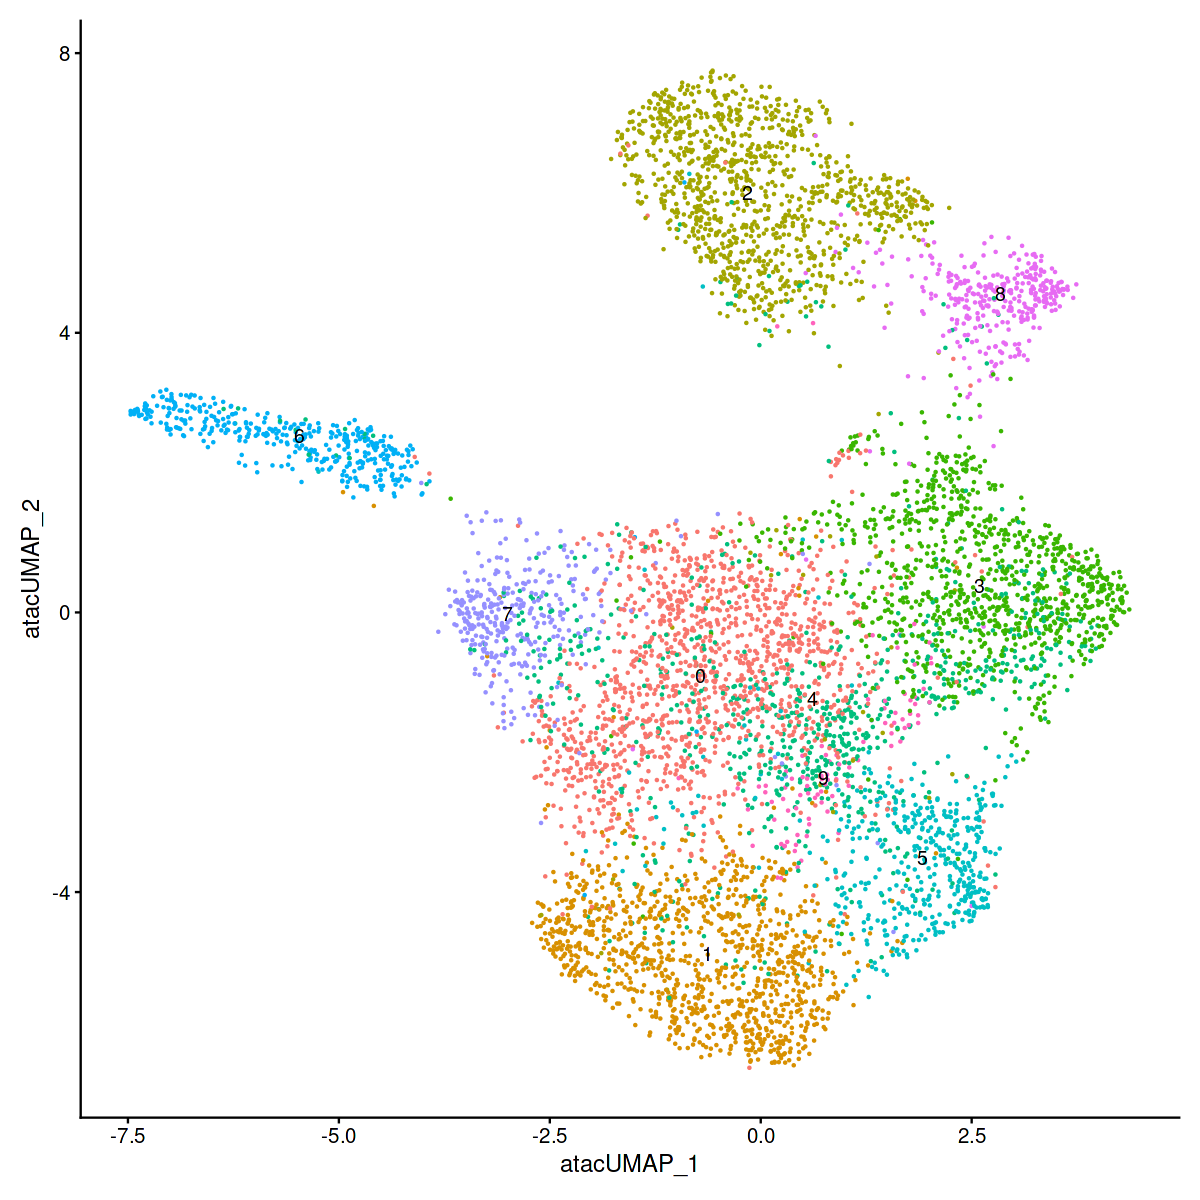

In [26]:
DimPlot(object = seurat, label = TRUE) + NoLegend()

# RNA+ATAC Joint analysis 

In [27]:
seurat <- FindMultiModalNeighbors(seurat, reduction.list = list("pca", "lsi"), dims.list = list(1:50, 2:50))
seurat <- RunUMAP(seurat, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
seurat <- FindClusters(seurat, graph.name = "wsnn", algorithm = 3, verbose = FALSE)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

14:41:32 UMAP embedding parameters a = 0.9922 b = 1.112

14:41:33 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

14:41:35 Initializing from normalized Laplacian + noise (using irlba)

14:41:35 Commencing optimization for 500 epochs, with 208224 positive edges

14:41:44 Optimization finished



In [28]:
DefaultAssay(seurat) <- "SCT"
tf.list <- genes_to_plot
tf.list.2 <- c("NANOG", "POU5F1", "PODXL", "AC003975.1")
options(repr.plot.width=18, repr.plot.height=14)

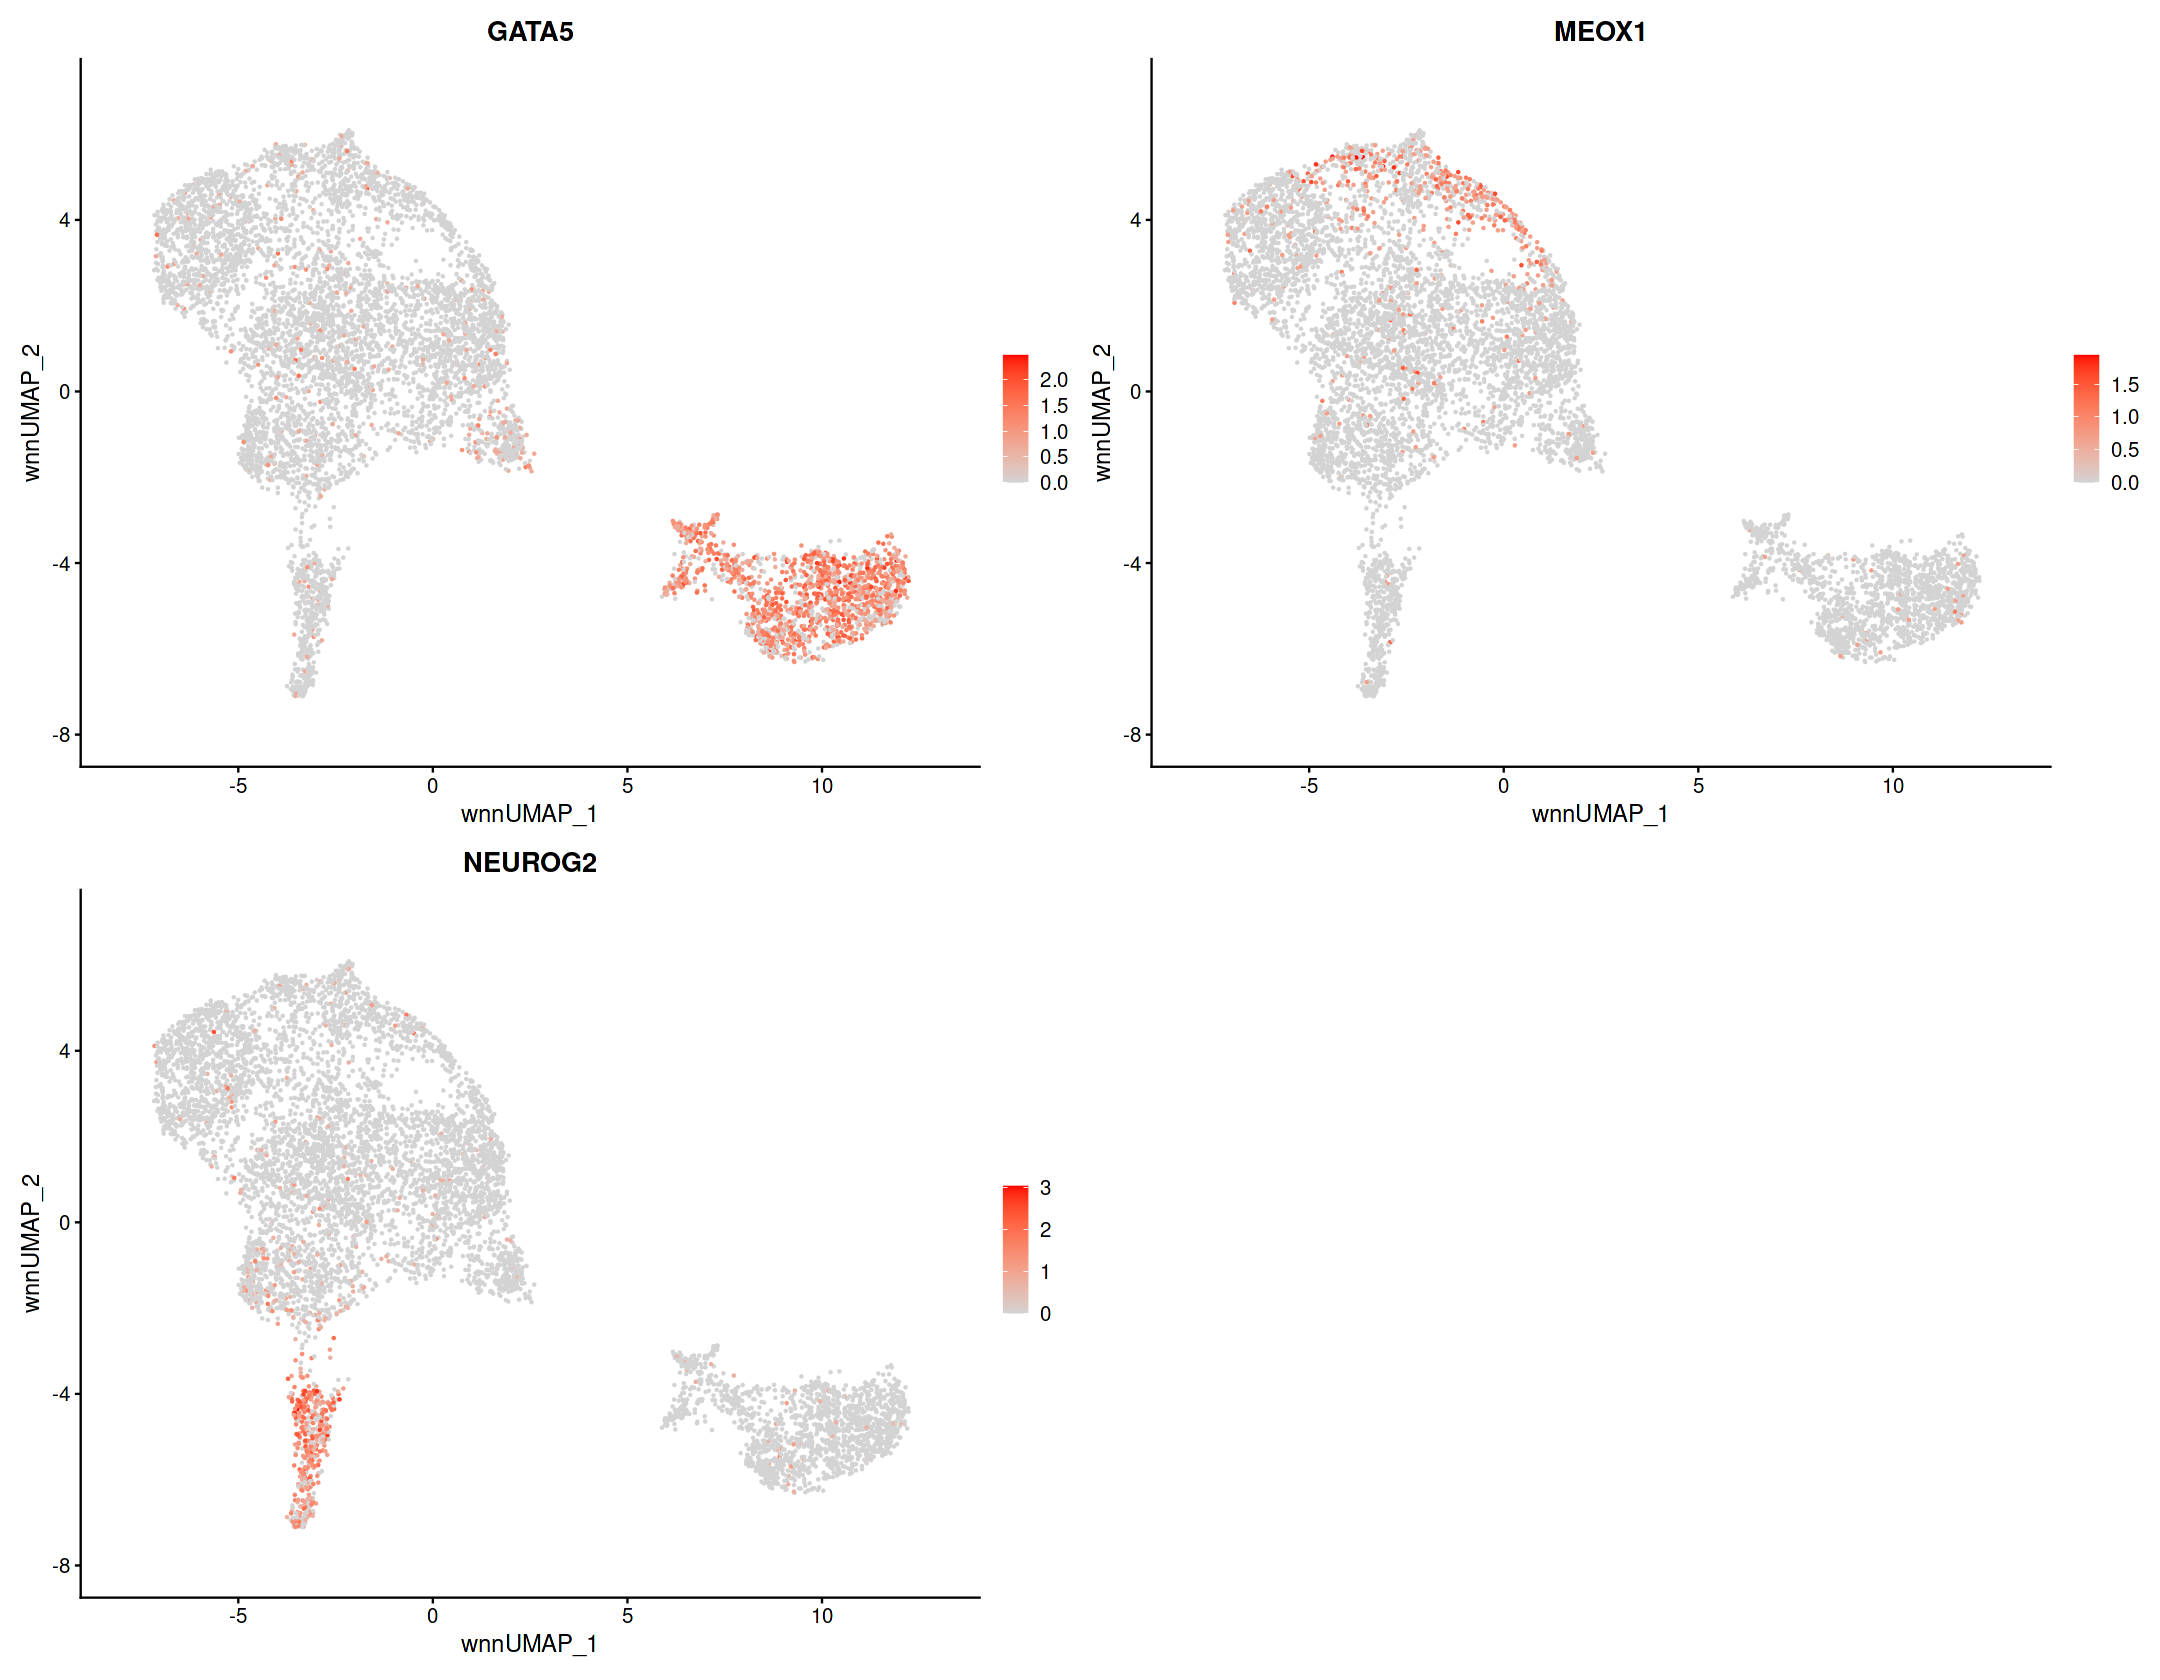

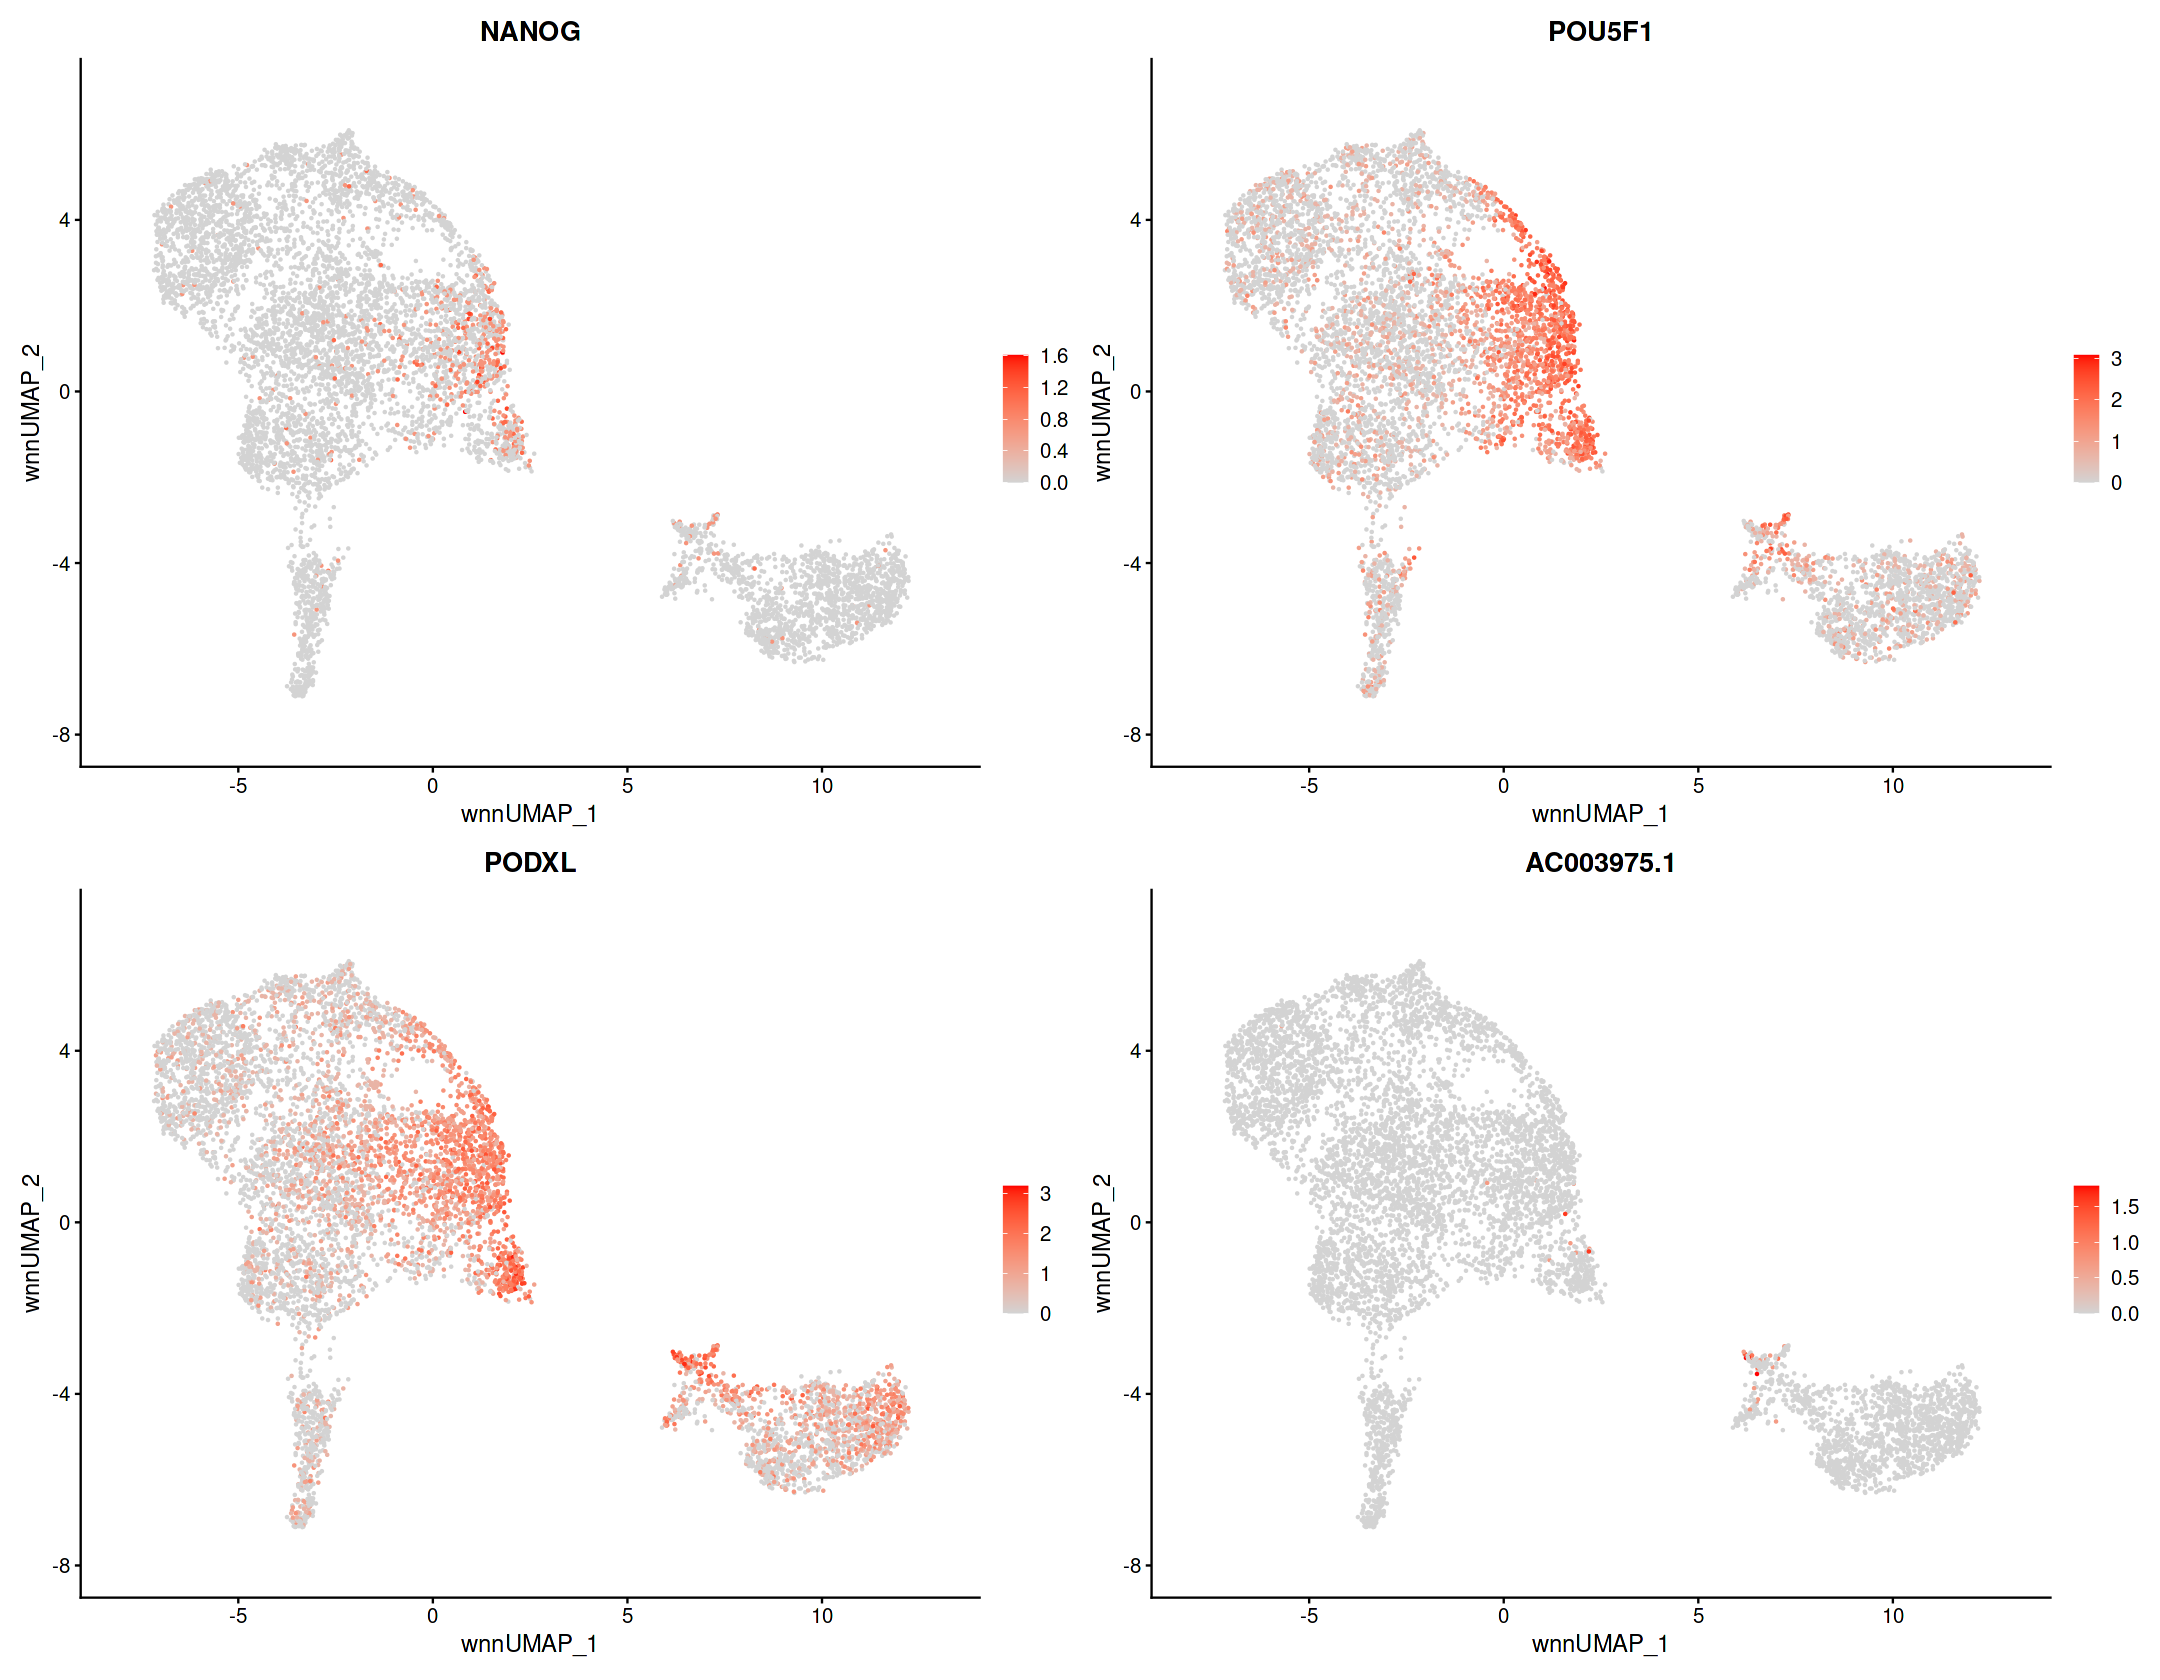

In [29]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot_2 <- FeaturePlot(seurat, features = tf.list.2, reduction = 'wnn.umap', cols = c("lightgrey", "red"))
gene_plot
gene_plot_2 

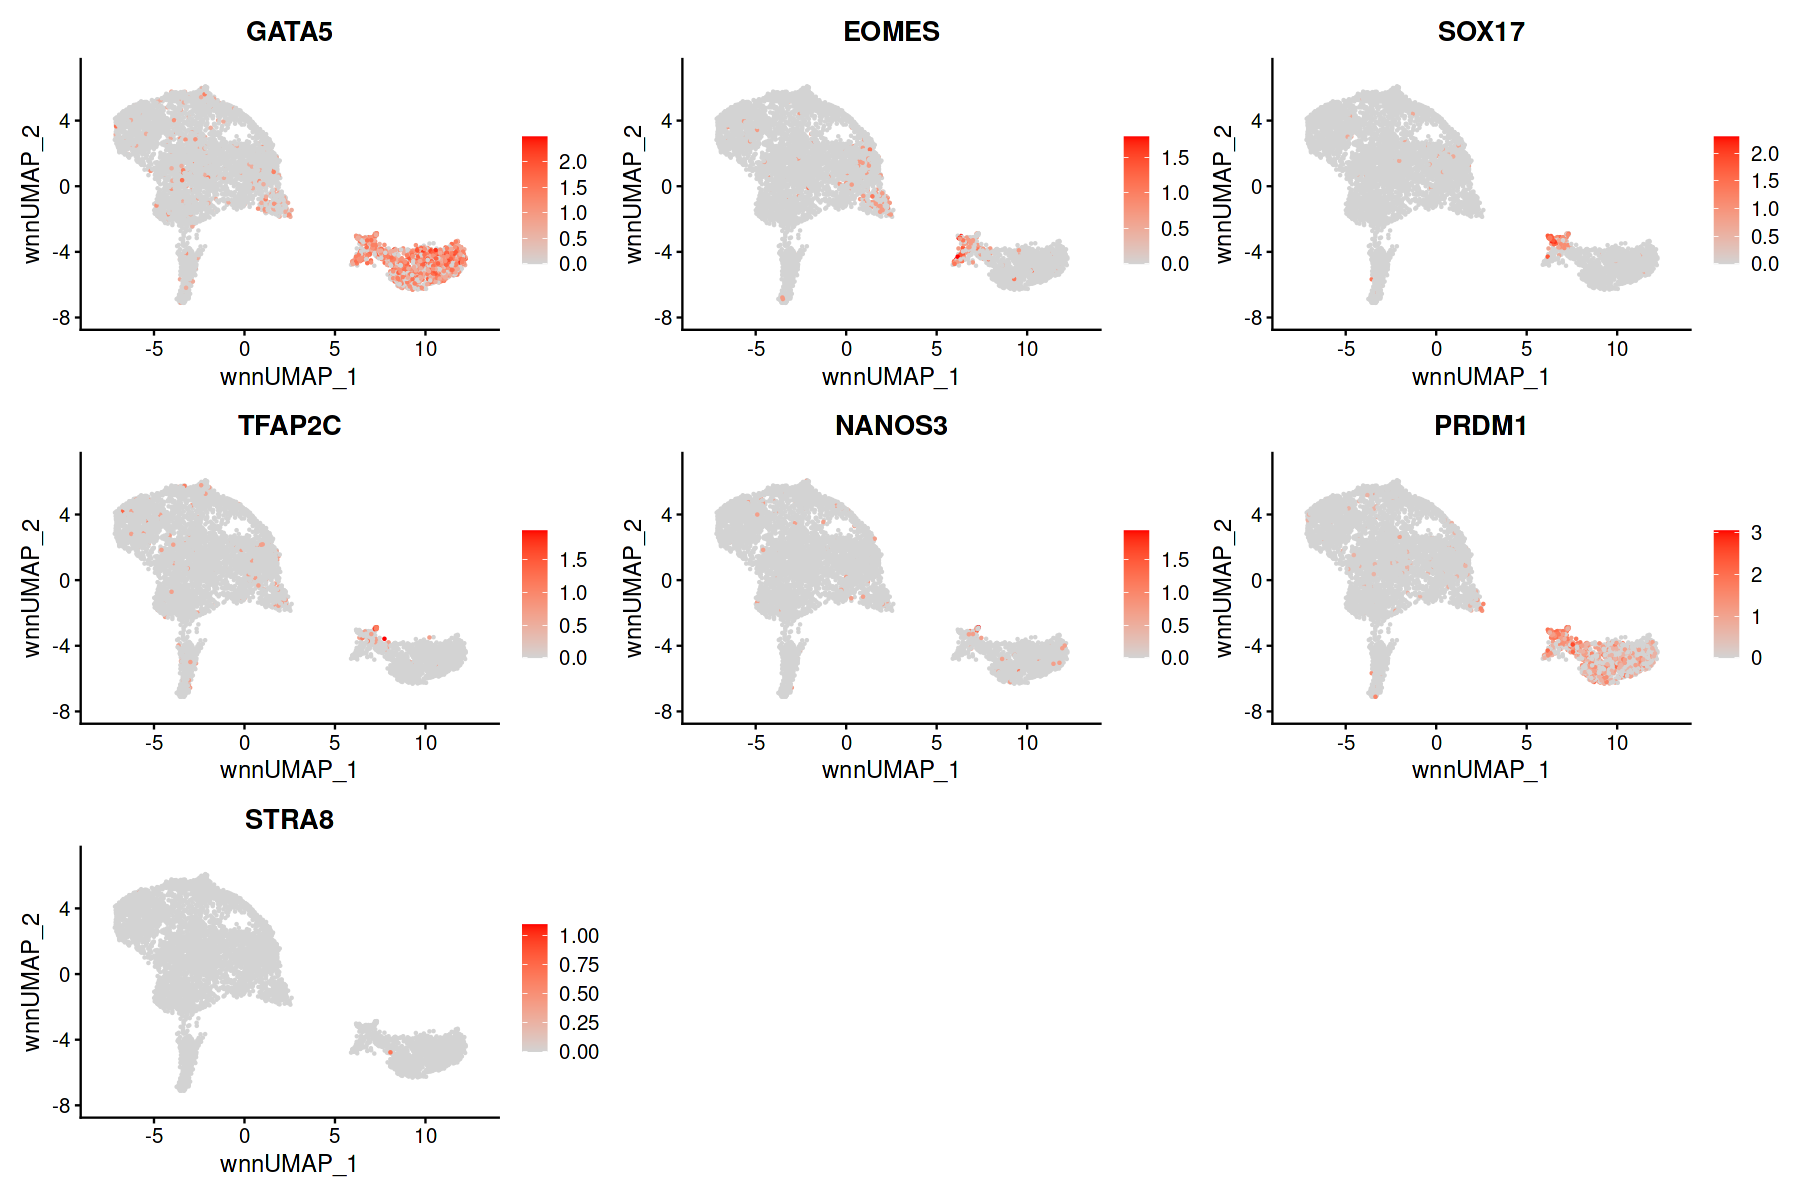

In [30]:
options(repr.plot.width=15, repr.plot.height=10)
gene_plot <- FeaturePlot(seurat, features = c("GATA5", "EOMES", "SOX17", "TFAP2C", "NANOS3", "PRDM1", "STRA8"), reduction = 'wnn.umap', 
                         cols = c("lightgrey", "red"), ncol = 3)
gene_plot

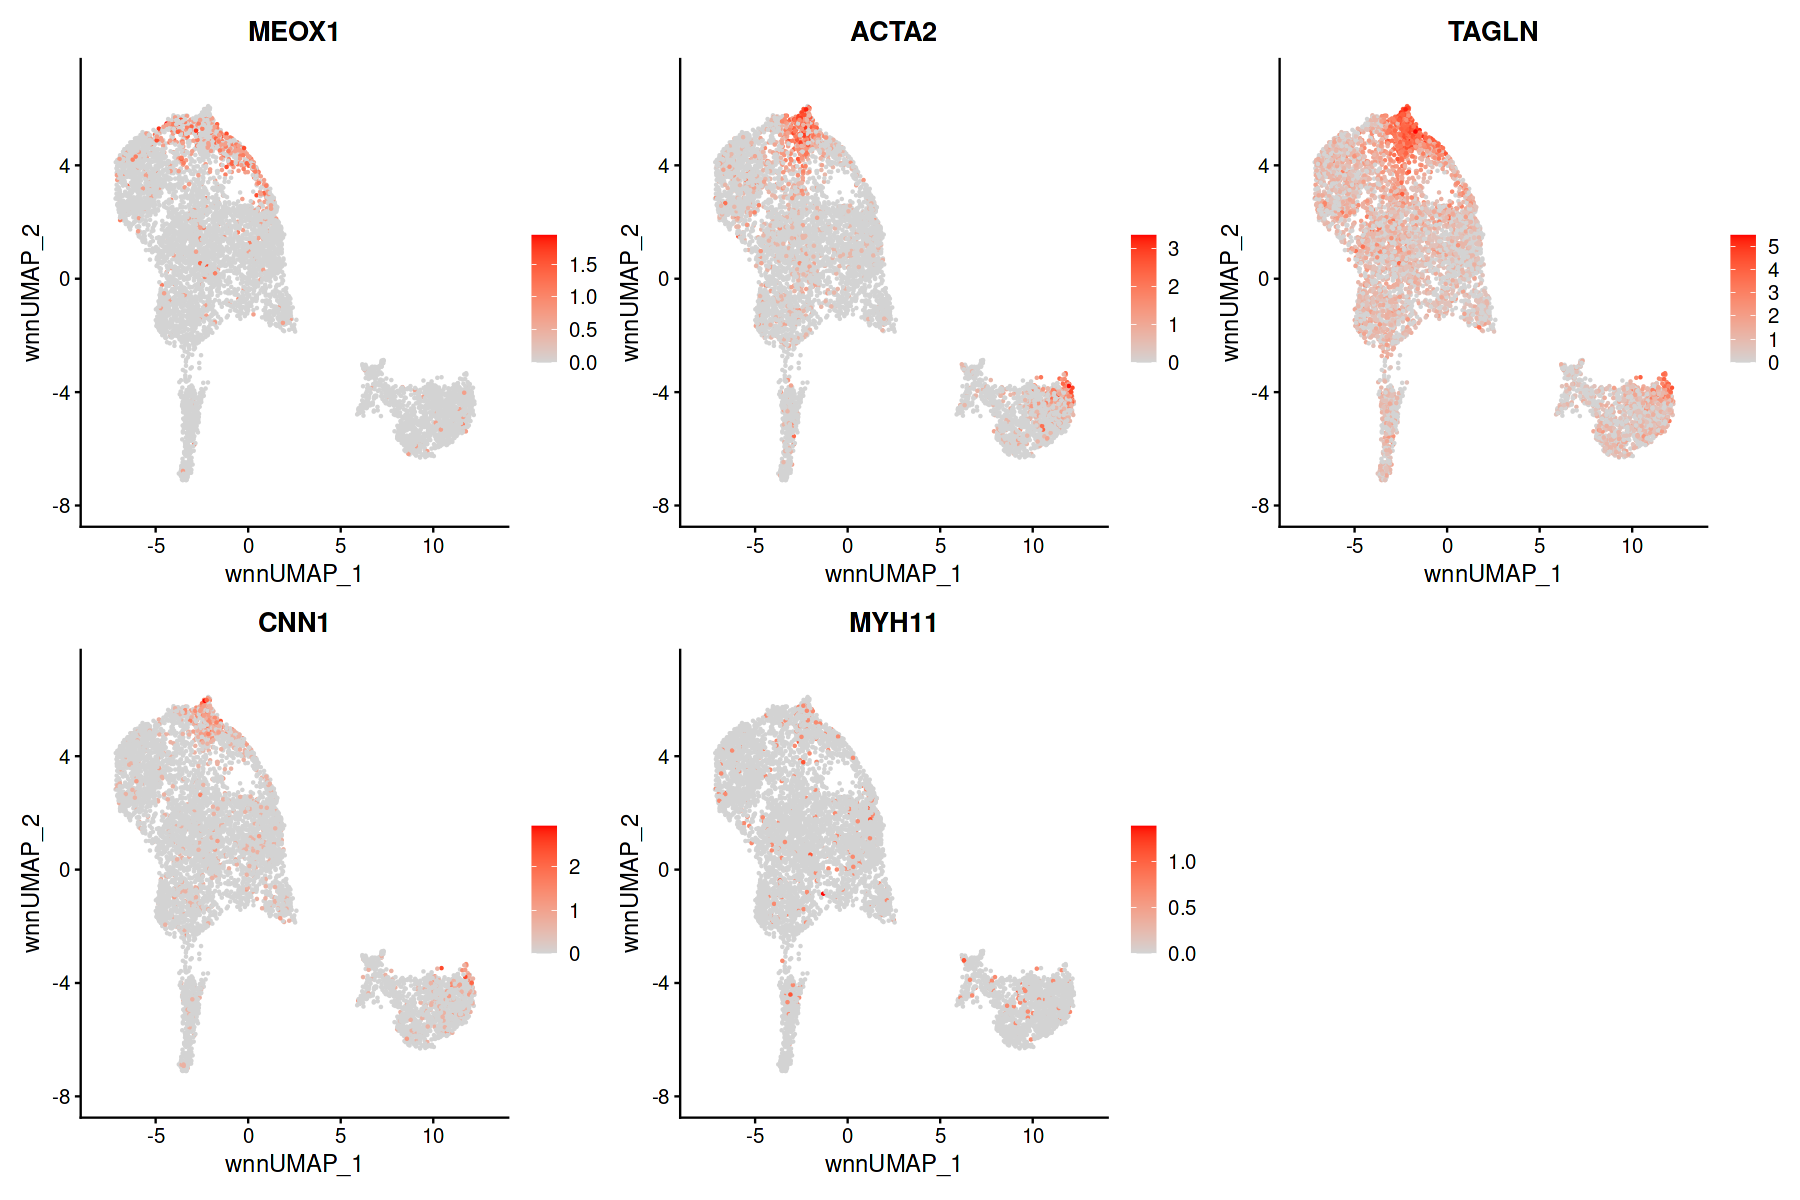

In [31]:
options(repr.plot.width=15, repr.plot.height=10)
gene_plot <- FeaturePlot(seurat, features = c("MEOX1", "ACTA2", "TAGLN", "CNN1", "MYH11"), reduction = 'wnn.umap', 
                         cols = c("lightgrey", "red"), ncol = 3)
gene_plot

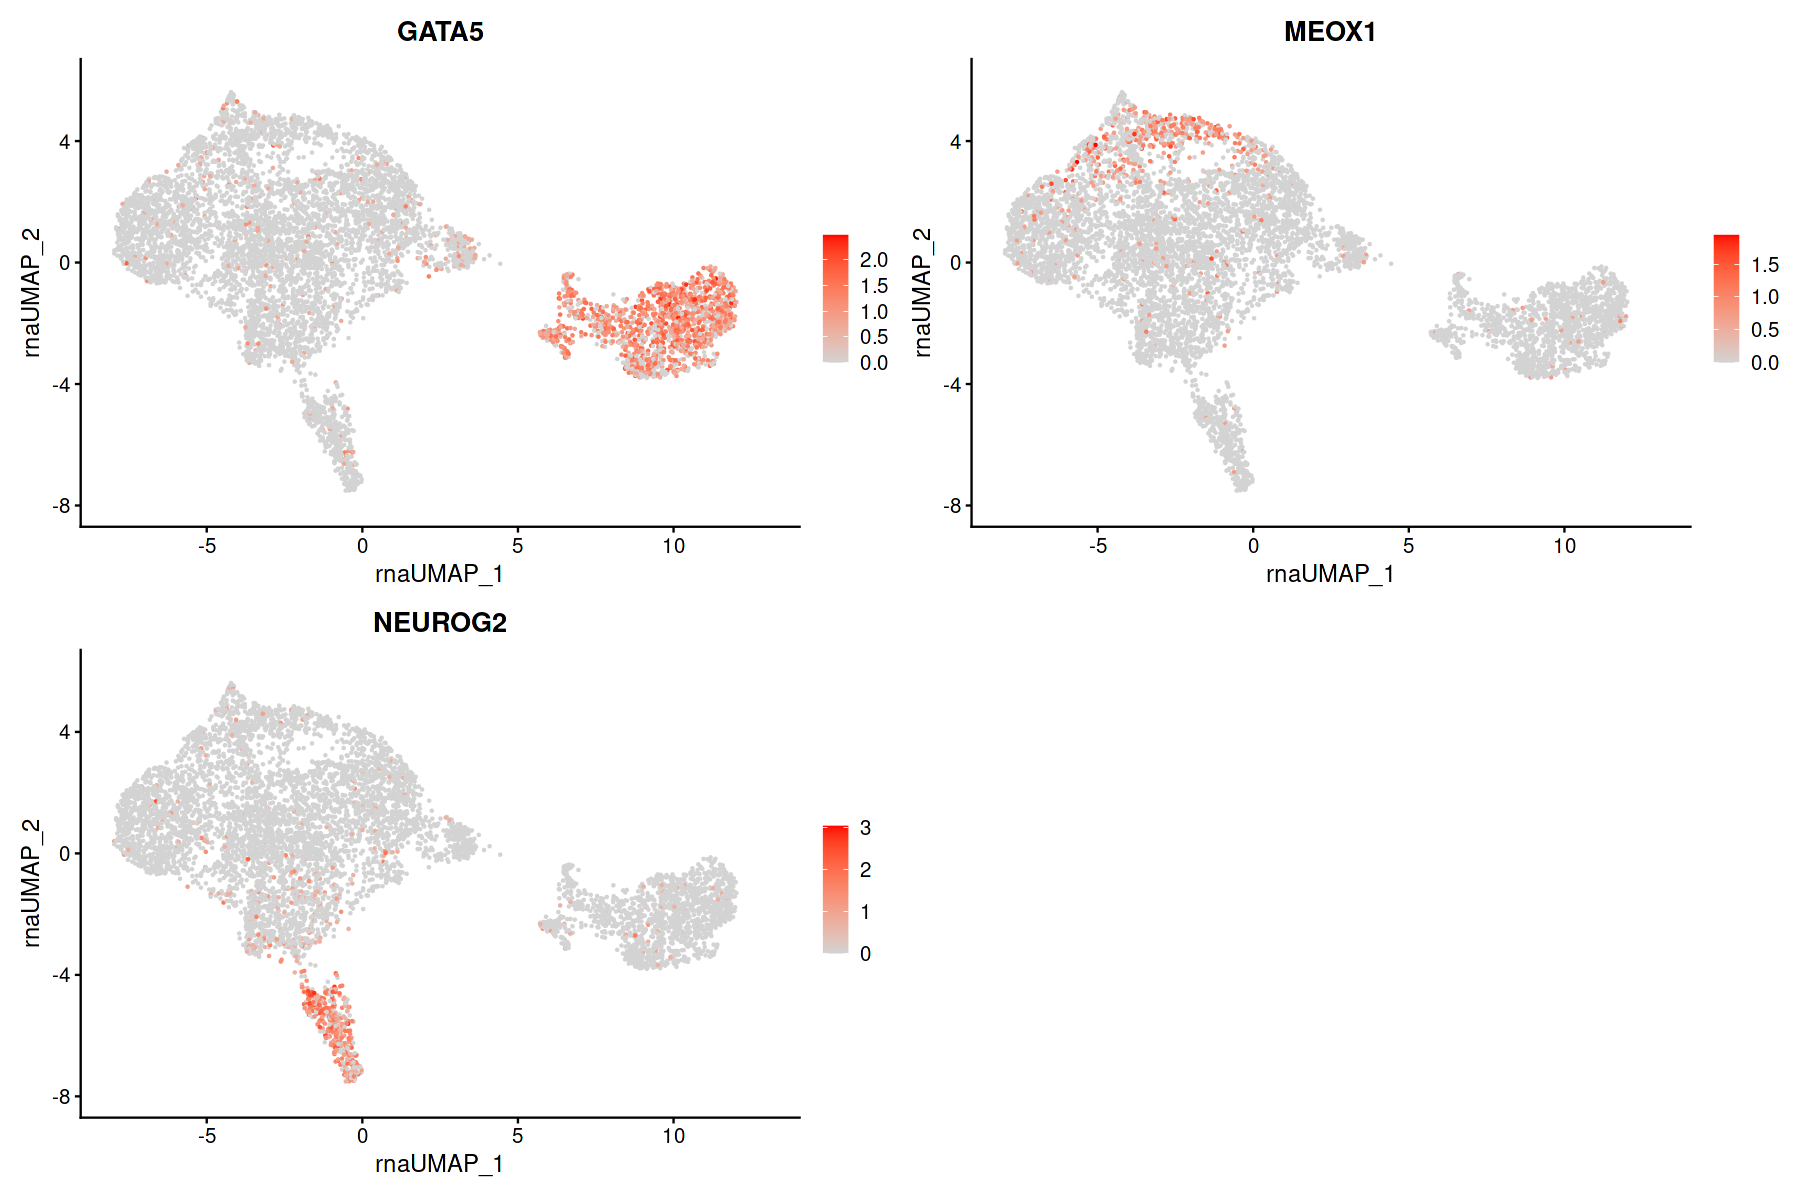

In [31]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.rna', cols = c("lightgrey", "red"))
gene_plot 

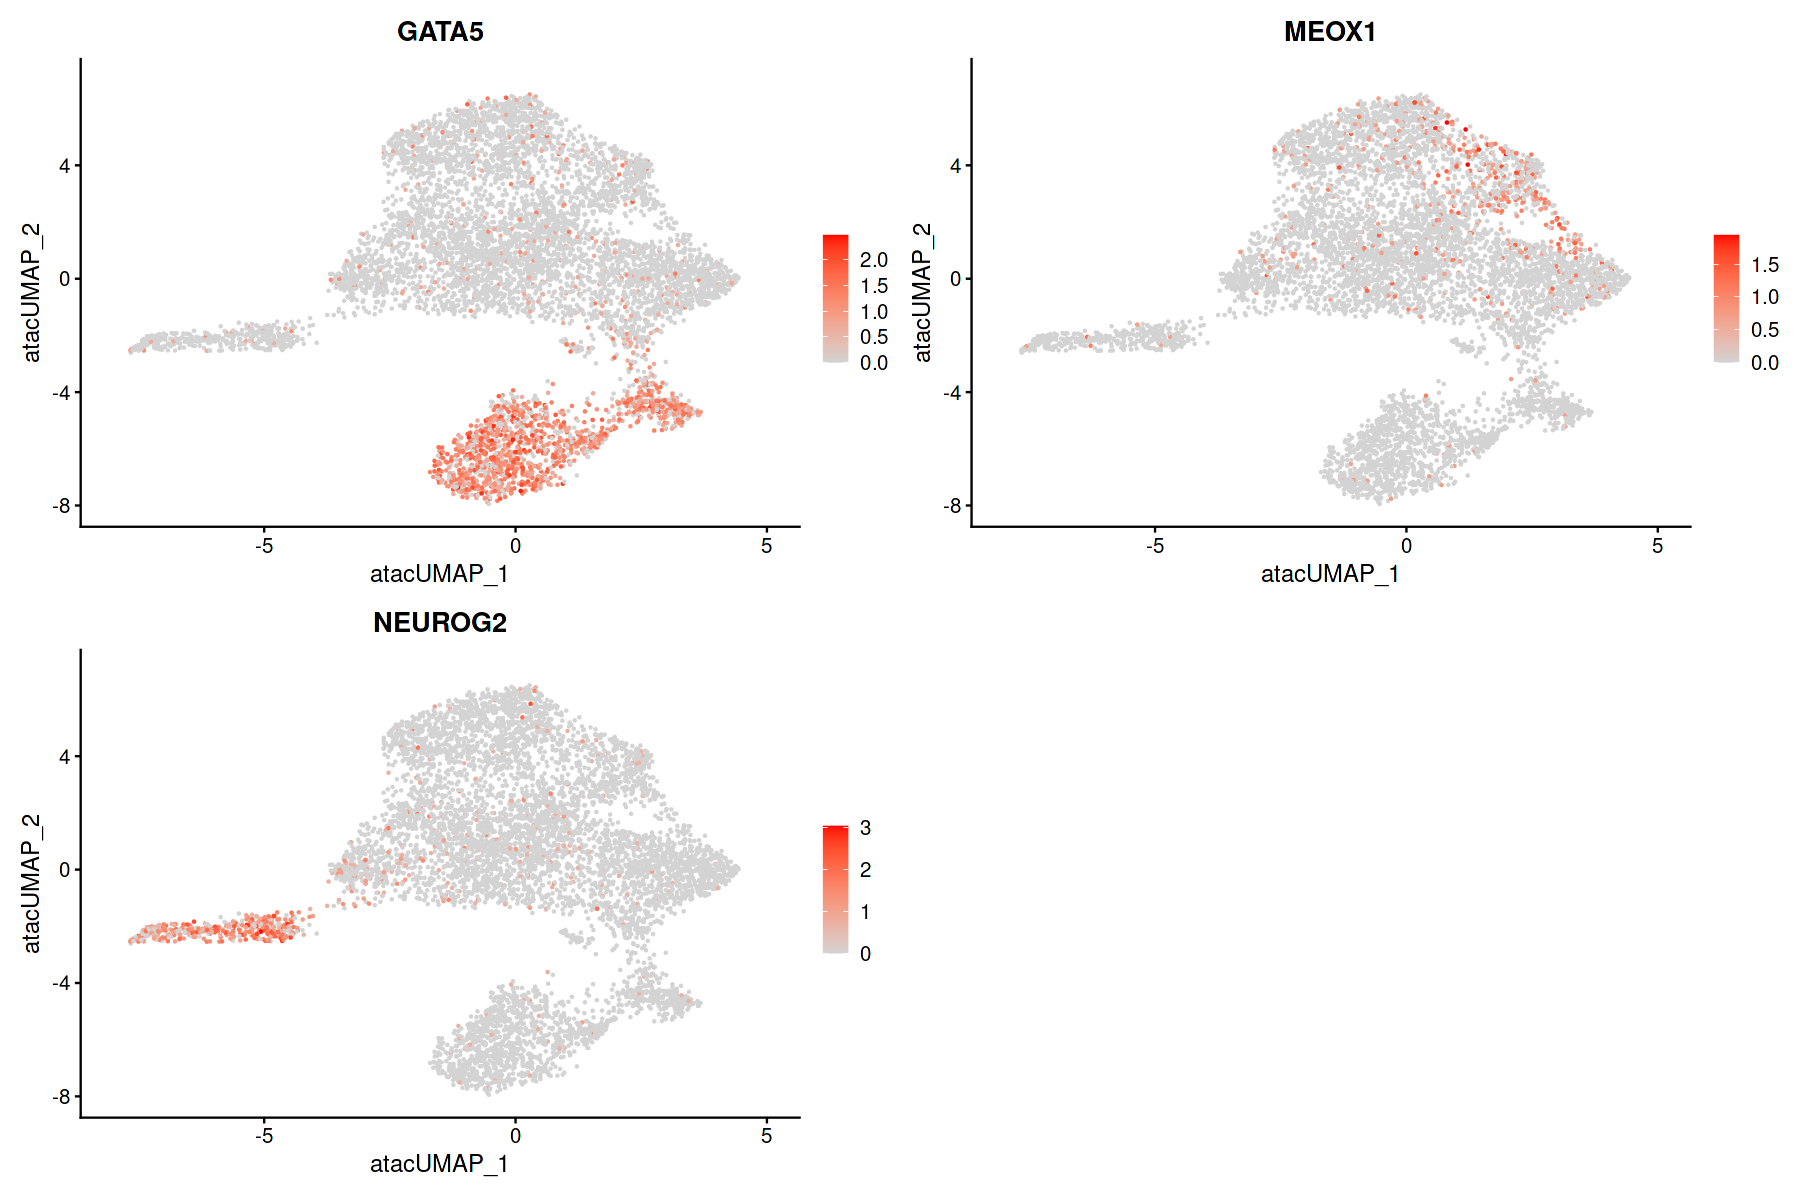

In [32]:
gene_plot <- FeaturePlot(seurat, features = tf.list, reduction = 'umap.atac', cols = c("lightgrey", "red"))
gene_plot 

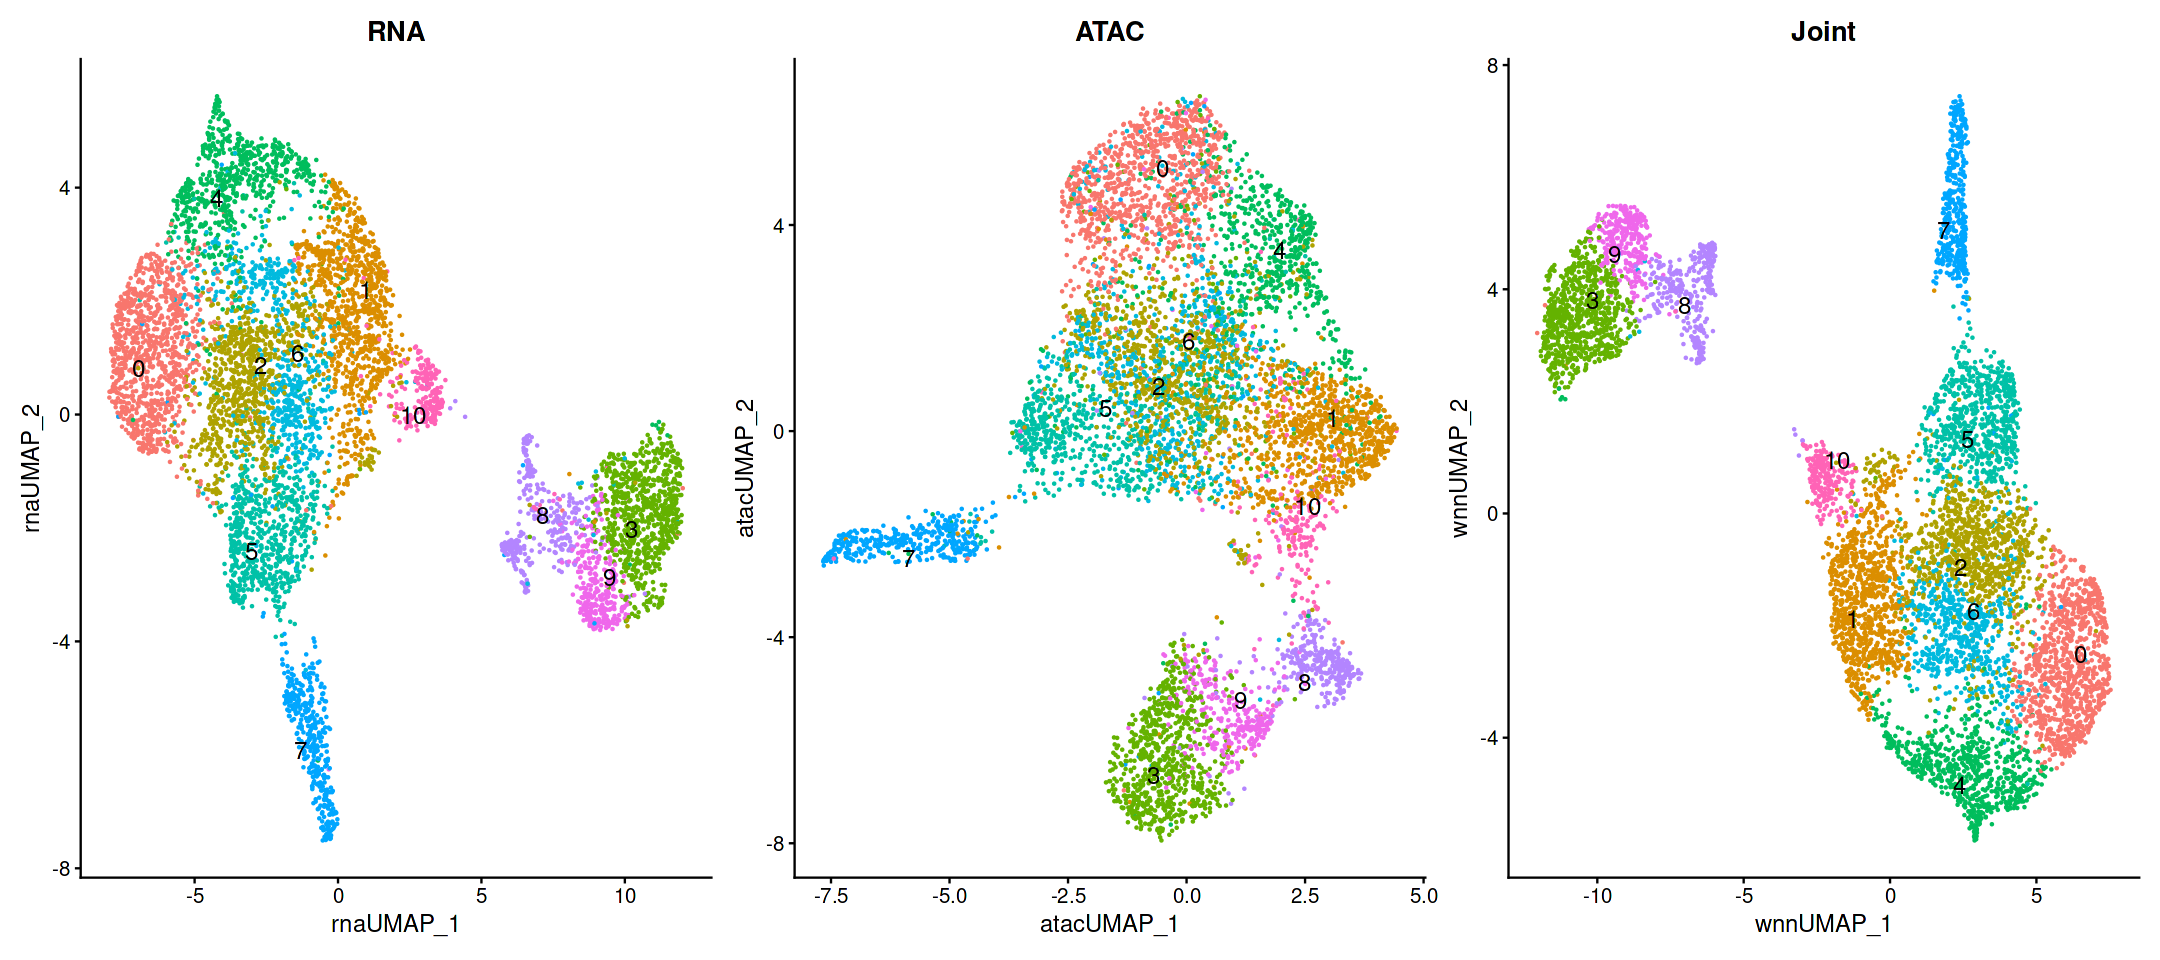

In [33]:
p1 <- DimPlot(seurat, reduction = "umap.rna",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(seurat, reduction = "umap.atac", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(seurat, reduction = "wnn.umap",  label = TRUE, label.size = 5, repel = TRUE) + ggtitle("Joint")
options(repr.plot.width=18, repr.plot.height=8)
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [34]:
# add annotations
# seurat <- RenameIdents(seurat, 'GATA5a' = '13' , 'GATA5b' = '16')
# seurat <- RenameIdents(seurat, 'iPSC' = '5')
# seurat <- RenameIdents(seurat, 'MEOX1' = '10')
# seurat <- RenameIdents(seurat, 'NGN2' = '11')

#seurat$celltype <- Idents(seurat)

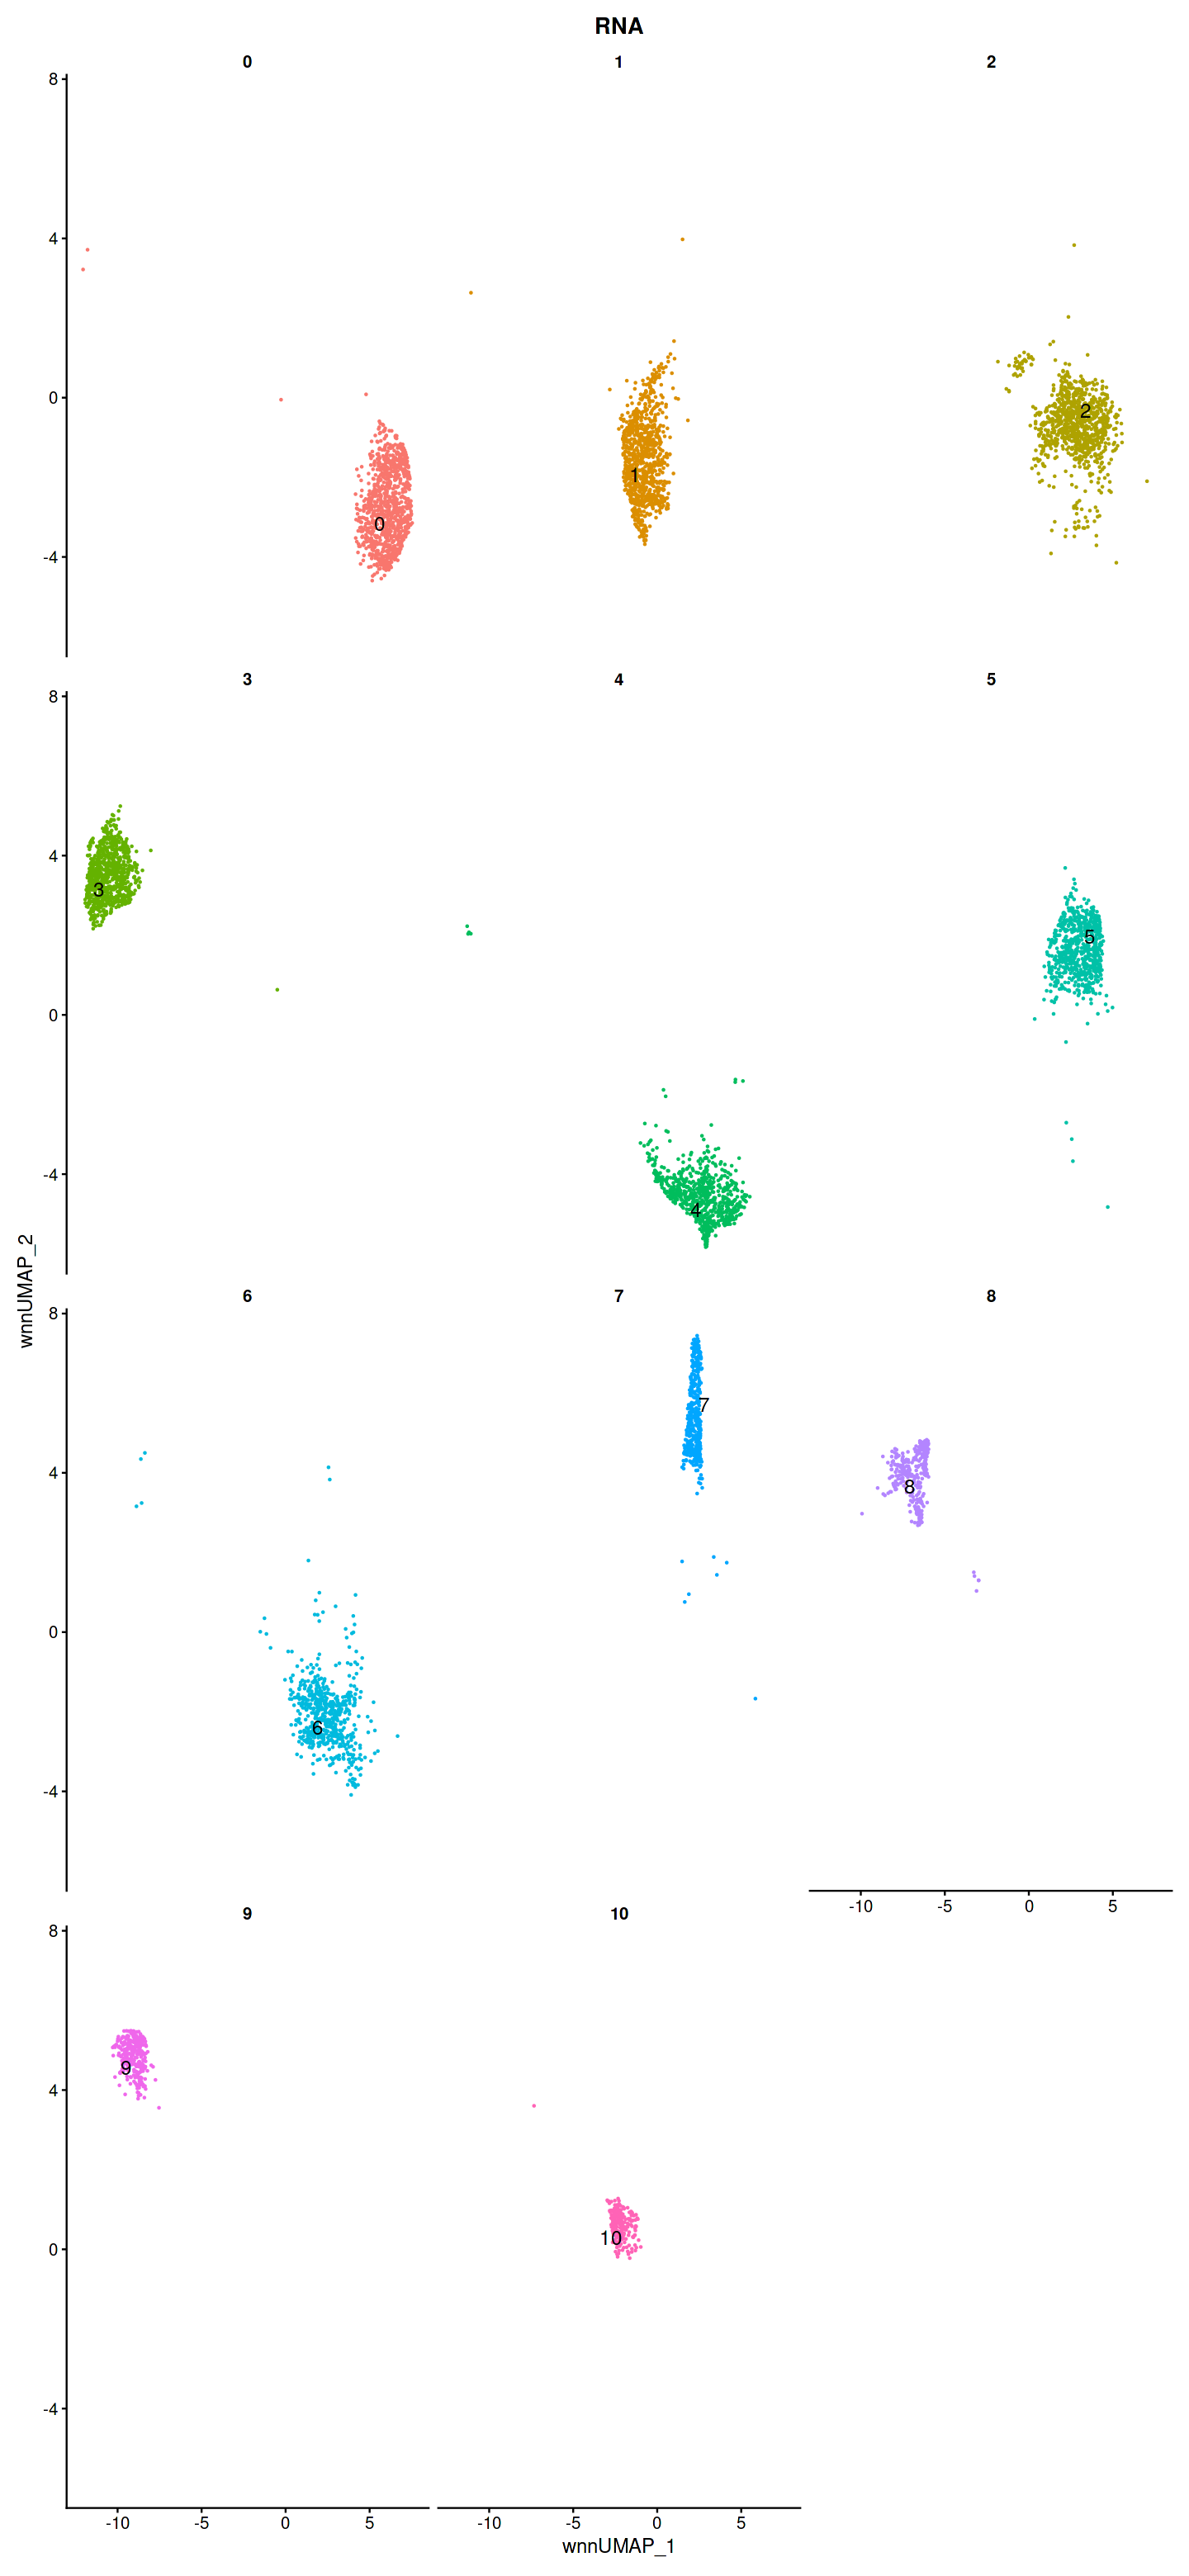

In [35]:
options(repr.plot.width=12, repr.plot.height=26)
p1 <- DimPlot(seurat, reduction = "wnn.umap", ncol = 3, split.by = 'seurat_clusters' , label = TRUE, label.size = 5, repel = TRUE) + ggtitle("RNA")
p1 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [36]:
new_h5_name = sub(".h5seurat", "_ONLY_SINGLETS.h5seurat", h5_name)
SaveH5Seurat(seurat, new_h5_name, overwrite=TRUE, verbose=FALSE)

Warning message:
"Overwriting previous file /home/jupyter-ayang/notebooks/cat-atac_pipeline/cond9/secondary/output/seurat/CATATAC_5_CRISPR9_ONLY_SINGLETS.h5seurat"
Creating h5Seurat file for version 3.1.5.9900

